In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#! pip install imutils
#!pip install tqdm
#! pip install kaggle

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from skimage.io import imshow
import tensorflow.keras.utils as np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.utils import img_to_array , to_categorical
from tensorflow.keras import layers, models
import os
import random


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Jesus help me

In [2]:

#os.listdir("/kaggle/input/affectnet/AffectNet/train")

#for dirname, _, filenames in os.walk('/kaggle/input/affectnet/AffectNet/train'):
#   for filename in filenames:
#        print(os.path.join(dirname, filename))

fahdashdah

In [3]:
def numtoemotion(a):
    match a:
      case 0 | "0":
        return "Irritação"
      case 3 | "3":
        return "Felicidade"
      case 4 | "4":
        return "Tristeza"
      case 5 | "5":
        return "Surpresa"
      case 6 | "6":
        return "Neutralidade"
      case _:
        return "Erro"

Substituindo imutils

In [4]:

image_types = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")


def list_images(basePath, contains=None):
    # return the set of files that are valid
    return list_files(basePath, validExts=image_types, contains=contains)


def list_files(basePath, validExts=None, contains=None):
    # loop over the directory structure
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        # loop over the filenames in the current directory
        for filename in filenames:
            # if the contains string is not none and the filename does not contain
            # the supplied string, then ignore the file
            if contains is not None and filename.find(contains) == -1:
                continue

            # determine the file extension of the current file
            ext = filename[filename.rfind("."):].lower()

            # check to see if the file is an image and should be processed
            if validExts is None or ext.endswith(validExts):
                # construct the path to the image and yield it
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [5]:
path_dataset = "/kaggle/input/affectnet/AffectNet/train"

#Carrega a lista de labels
dir = os.listdir(path_dataset)

varname = []
for i in dir:
    if i=="0" or i=="3" or i=="4" or i=="5" or i=="6":
        varname.append(i)
    else:
        continue
print(varname)

['5', '0', '3', '4', '6']


In [6]:


label_dict = {}



for i, d in enumerate(sorted(varname)):
    label_dict[d] = i
    print(d," - ",numtoemotion(d))


print("\n")
print("label_dict: ",label_dict)

#Calcula a quantidade de classes
num_classes = len(label_dict)

print("Número de classes: ", num_classes) # deve dar 5

# neutralidade(6),
# felicidade(3),
# irritação(0),
# surpresa(5)
# tristeza(4)


0  -  Irritação
3  -  Felicidade
4  -  Tristeza
5  -  Surpresa
6  -  Neutralidade


label_dict:  {'0': 0, '3': 1, '4': 2, '5': 3, '6': 4}
Número de classes:  5


Oh God, no

In [7]:
# grab the image paths and randomly shuffle them
unorderedImgPaths = list_images(path_dataset)

# unorderedImgPaths virá como '/kaggle/input/affectnet/AffectNet/train/6/image0017435.jpg'
# Quem estive na pasta 0,3,4,5 e 6 servirá para criar o modelo
selectedImgPaths = []
for path in unorderedImgPaths:
    match path.split(os.path.sep)[-2]:
        case 0 | "0" | 3 | "3" | 4 | "4" | 5 | "5" | 6 | "6":
            selectedImgPaths.append(path)
        case _: continue

assert len(selectedImgPaths) != 0
    
    

imagePaths = sorted(list(selectedImgPaths))
print("Verifique os seguintes caminhos: ", imagePaths[-5:])
random.seed(42)
random.shuffle(imagePaths)
#print(imagePaths)

Verifique os seguintes caminhos:  ['/kaggle/input/affectnet/AffectNet/train/6/image0017435.jpg', '/kaggle/input/affectnet/AffectNet/train/6/image0017436.jpg', '/kaggle/input/affectnet/AffectNet/train/6/image0017437.jpg', '/kaggle/input/affectnet/AffectNet/train/6/image0017438.jpg', '/kaggle/input/affectnet/AffectNet/train/6/image0017441.jpg']


anything but this

In [8]:
labels = []
data = []
none_image = 0

print("[INFO] loading images...")
# loop over the input images

for imagePath in tqdm(imagePaths):
    # load the image, pre-process it, and store it in the data list
    # print(f"image_path=\n{imagePath}")
    image = cv2.imread(imagePath)
    if image is not None:
        # print(f"image=\n{image}")
        image = cv2.resize(image, (80, 80))
        #Converts Image instance to a Numpy array
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list


        label = label_dict[imagePath.split(os.path.sep)[-2]]
        # print(label)
        labels.append(label)
    else:
        none_image += 1
       

print(none_image)

[INFO] loading images...


100%|██████████| 25000/25000 [03:44<00:00, 111.39it/s]

0


ugh

In [9]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(train_images, test_images, train_l, test_l) = train_test_split( data, labels, test_size=0.25, random_state=42)
#print(train_l)
#print(test_l)
#print(num_classes)
# convert the labels from integers to vectors
train_labels = np_utils.to_categorical(train_l, num_classes=num_classes)
test_labels = np_utils.to_categorical(test_l, num_classes=num_classes)

**"l-l"**

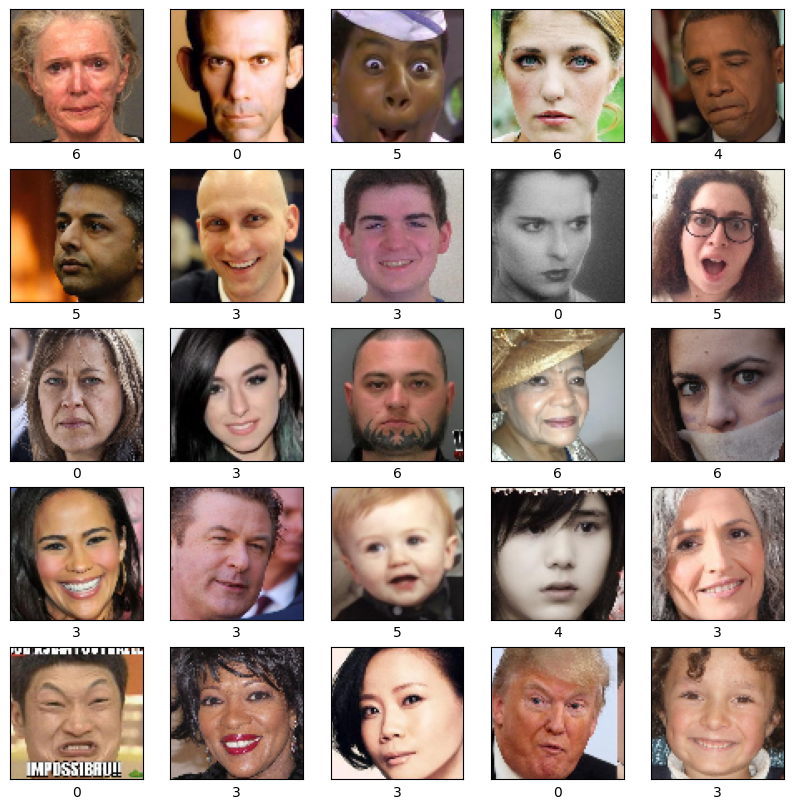

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_float32 = np.float32(train_images[i])
    plt.imshow(cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB) )
    # labels
    plt.xlabel( [k for k, v in label_dict.items() if v == train_l[i]][0] )
plt.show()

Data shape

In [11]:
data.shape

(25000, 80, 80, 3)

someone, please, just save me

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(80, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3))) # 3 é sobre RGB
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(160, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(160, activation='relu')) # Dense: Núm. neurônios 1a cam
model.add(layers.Dense(40, activation='relu')) # Dense: Núm. neurônios 1a cam
model.add(layers.Dense(num_classes, activation="softmax"))
# Conv2D( 80 ) -> Conv2D( 160 ) -> Dense( 160 ) -> Dense( 40 ) -> Dense( 40 ) -> Dense( 5 )
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 78, 78, 80)     │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 39, 39, 80)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 160)    │       115,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 160)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 51840)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │     8,294,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         6,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           205 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,418,805 (32.12 MB)

 Trainable params: 8,418,805 (32.12 MB)

 Non-trainable params: 0 (0.00 B)

wait what

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_l, epochs=100, batch_size=20,
                    validation_data=(test_images, test_l))

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1731958313.145546     104 service.cc:145] XLA service 0x7870b4008040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731958313.145593     104 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731958313.145597     104 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 10/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.1821 - loss: 1.7260

I0000 00:00:1731958317.795794     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.2727 - loss: 1.5696 - val_accuracy: 0.4219 - val_loss: 1.3865
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4399 - loss: 1.3407 - val_accuracy: 0.4669 - val_loss: 1.2813
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5003 - loss: 1.2268 - val_accuracy: 0.5075 - val_loss: 1.2386
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.5330 - loss: 1.1522 - val_accuracy: 0.5198 - val_loss: 1.1887
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5764 - loss: 1.0671 - val_accuracy: 0.5309 - val_loss: 1.1630
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5982 - loss: 1.0054 - val_accuracy: 0.5315 - val_loss: 1.1602
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.6387 - loss: 0.9273 - val_accuracy: 0.5410 - val_loss: 1.1829
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6704 - loss: 0.8480 - val_accura

i am breathing

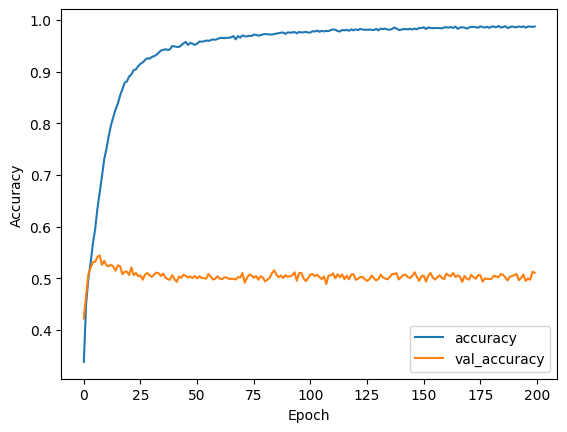

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

I AM BREATHING

In [15]:
print("Generating test predictions...")
predict_x=model.predict(test_images)
print(np.around(predict_x, 2))

# make class predictions
predictions = (predict_x > 0.5).astype(int)

y_pred_class = np.argmax(predictions, axis=1)
y_test_class = np.argmax(test_labels, axis=1)

for i in range(len(test_labels)):
	if y_pred_class[i] == y_test_class[i]:
		print(f'\033[92m {y_pred_class[i]} (expected {y_test_class[i]})')
	else:
		print(f'\033[91m {y_pred_class[i]} (expected {y_test_class[i]})')

Generating test predictions...
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[0.   0.01 0.86 0.   0.13]
 [0.   0.91 0.   0.07 0.02]
 [0.   0.   1.   0.   0.  ]
 ...
 [0.   0.12 0.74 0.03 0.1 ]
 [0.   0.   0.   1.   0.  ]
 [0.99 0.   0.01 0.   0.  ]]
 2 (expected 4)
 1 (expected 0)
 2 (expected 2)
 3 (expected 1)
 0 (expected 0)
 0 (expected 0)
 2 (expected 1)
 4 (expected 1)
 2 (expected 2)
 3 (expected 3)
 2 (expected 2)
 0 (expected 2)
 3 (expected 3)
 3 (expected 2)
 1 (expected 1)
 0 (expected 2)
 1 (expected 0)
 1 (expected 2)
 0 (expected 0)
 0 (expected 2)
 3 (expected 3)
 2 (expected 2)
 2 (expected 2)
 4 (expected 2)
 4 (expected 0)
 0 (expected 0)
 3 (expected 2)
 2 (expected 2)
 3 (expected 3)
 0 (expected 3)
 3 (expected 3)
 2 (expected 4)
 1 (expected 1)
 1 (expected 1)
 2 (expected 2)
 0 (expected 4)
 4 (expected 4)
 0 (expected 4)
 1 (expected 1)
 0 (expected 2)
 2 (expected 4)
 1 (expected 1)
 0 (expected 2)
 0 (expected 0)
 2 (expected 0)
 0 (expected 0)
 1 (expected 1)
 1

oH NO hE CAMEBACK AGAIN

In [16]:
# Avaliando a acurácia com as imagens de Teste
l = len(y_test_class)
y_test2 = y_test_class
y_pred2 = y_pred_class
acc = sum([y_pred_class[i]==y_test_class[i] for i in range(l)])/l
print('Accuracy: %.2f %%' % (acc*100))

f1score = 0
f1score += f1_score(y_test2,y_pred2,average="weighted")
print("F_measure: ",round(100*f1score, 2),"%")
# Calcular com F_meansure


Accuracy: 50.78 %
F_measure:  50.53 %


In [17]:
#nOOOOOO MORE TYPELESS STUFF, PLEASE

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

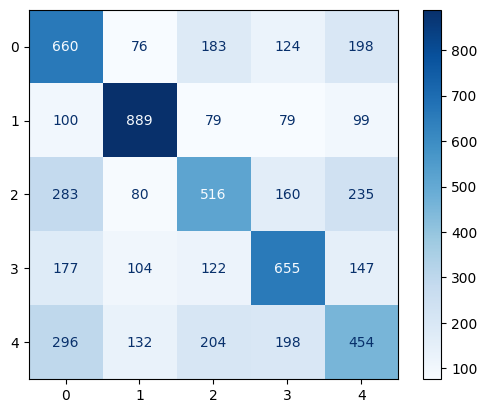

In [18]:
# voltando pro formato de classes
y_pred = np.argmax(predictions, axis=1)
y_test_c = np.argmax(test_labels, axis=1)


#Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=numtoemotion(label_dict))
disp.plot(cmap=plt.cm.Blues)


ok, just one more fucking sip into python

In [ ]:
model.save(r'./kaggle/working/dice.hdf5')
